## This notebook provides the information tracjectory during the course of training by vanilla SGD

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import pdb

from src.models import MLP
from src.dataset import load_data
from src.pib_utils import train
from src.utils import train_track_info
from src.utils import img_preprocess, setup_seed, predict, eval_metric, feature_map_size

use_gpu = True if torch.cuda.is_available() else False

## Load data and set environment

In [2]:
__data_set__ = 'mnist'
__layers__ = [512,]
x_tr, y_tr, x_va, y_va, x_te, y_te = load_data(__data_set__)
all_tr_idx = np.arange(len(x_tr))
num_class = np.unique(y_va).shape[0]
x_tr, y_tr = img_preprocess(x_tr, y_tr, use_gpu)
x_va, y_va = img_preprocess(x_va, y_va, use_gpu)
x_te, y_te = img_preprocess(x_te, y_te, use_gpu)
setup_seed(2020)

load from MNIST
Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz


D:\PAC-Bayes IB\PAC-Bayes-IB\src\utils.py:20: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  y = torch.LongTensor(y)


## Start training by vanilla SGD and track the information

In [3]:
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=False,)
print("finish training and tracking")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.98it/s]


initialize model weights.
done get prior weights
finish training and tracking


## Plot the tracked information during training

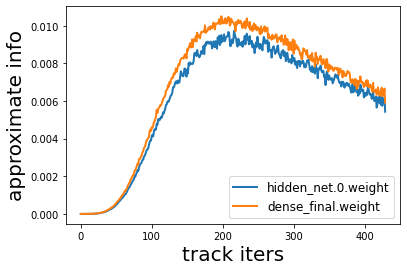

In [4]:
df_info = pd.DataFrame(info_dict)
for col in df_info.columns:
    plt.plot(df_info[col], label=col, lw=2)
plt.legend(fontsize=12)
plt.xlabel('track iters', size=20)
plt.ylabel('approximate info',size=20)
plt.show()

## A clear phase transition happens during the whole training period.

## How about when we set layers to be three?

In [5]:
__layers__ = [512, 100,]
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=True,)
print("finish training and tracking")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.17it/s]


initialize model weights.
done get prior weights
iteration/epoch: 10/0, info: {'hidden_net.0.weight': 1.1331528597391394e-11, 'hidden_net.1.weight': 2.196179696434264e-11, 'dense_final.weight': 5.980266976068904e-11}
iteration/epoch: 20/0, info: {'hidden_net.0.weight': 9.419545698996501e-11, 'hidden_net.1.weight': 1.0316971582602363e-10, 'dense_final.weight': 2.4560553590902146e-10}
iteration/epoch: 30/0, info: {'hidden_net.0.weight': 3.1280320000881545e-10, 'hidden_net.1.weight': 3.4813726901283815e-10, 'dense_final.weight': 5.31838351136571e-10}
iteration/epoch: 40/0, info: {'hidden_net.0.weight': 8.964237685482601e-10, 'hidden_net.1.weight': 9.784479892971376e-10, 'dense_final.weight': 2.1552790663292853e-09}
iteration/epoch: 50/0, info: {'hidden_net.0.weight': 2.3073216670610464e-09, 'hidden_net.1.weight': 2.674746868436273e-09, 'dense_final.weight': 5.5606603766023e-09}
iteration/epoch: 60/0, info: {'hidden_net.0.weight': 6.1869673828596206e-09, 'hidden_net.1.weight': 6.8817560539

iteration/epoch: 510/1, info: {'hidden_net.0.weight': 0.0020295416470617056, 'hidden_net.1.weight': 0.002292496617883444, 'dense_final.weight': 0.0023863022215664387}
iteration/epoch: 520/1, info: {'hidden_net.0.weight': 0.0017681997269392014, 'hidden_net.1.weight': 0.0023754313588142395, 'dense_final.weight': 0.0025454817805439234}
iteration/epoch: 530/1, info: {'hidden_net.0.weight': 0.00195051240734756, 'hidden_net.1.weight': 0.002290070056915283, 'dense_final.weight': 0.0023890468291938305}
iteration/epoch: 540/1, info: {'hidden_net.0.weight': 0.0017112750792875886, 'hidden_net.1.weight': 0.002373291878029704, 'dense_final.weight': 0.0025400177109986544}
iteration/epoch: 550/1, info: {'hidden_net.0.weight': 0.001538110082037747, 'hidden_net.1.weight': 0.0023699686862528324, 'dense_final.weight': 0.002546904608607292}
iteration/epoch: 560/1, info: {'hidden_net.0.weight': 0.0019403926562517881, 'hidden_net.1.weight': 0.002438704250380397, 'dense_final.weight': 0.0025520320050418377}


iteration/epoch: 1010/2, info: {'hidden_net.0.weight': 0.0024557204451411963, 'hidden_net.1.weight': 0.002994709648191929, 'dense_final.weight': 0.0027641525957733393}
iteration/epoch: 1020/2, info: {'hidden_net.0.weight': 0.0018160081235691905, 'hidden_net.1.weight': 0.002920172642916441, 'dense_final.weight': 0.002785636577755213}
iteration/epoch: 1030/2, info: {'hidden_net.0.weight': 0.002290333854034543, 'hidden_net.1.weight': 0.0028679748065769672, 'dense_final.weight': 0.0027394145727157593}
iteration/epoch: 1040/2, info: {'hidden_net.0.weight': 0.0024198361206799746, 'hidden_net.1.weight': 0.002996587660163641, 'dense_final.weight': 0.002949103945866227}
iteration/epoch: 1050/2, info: {'hidden_net.0.weight': 0.0024093554820865393, 'hidden_net.1.weight': 0.0029186177998781204, 'dense_final.weight': 0.00282630929723382}
iteration/epoch: 1060/2, info: {'hidden_net.0.weight': 0.0020156397949904203, 'hidden_net.1.weight': 0.0029707306530326605, 'dense_final.weight': 0.002966350642964

iteration/epoch: 1510/3, info: {'hidden_net.0.weight': 0.0012562839547172189, 'hidden_net.1.weight': 0.001739545725286007, 'dense_final.weight': 0.0016115602338686585}
iteration/epoch: 1520/3, info: {'hidden_net.0.weight': 0.0013304497115314007, 'hidden_net.1.weight': 0.0016331925289705396, 'dense_final.weight': 0.0013640752295032144}
iteration/epoch: 1530/3, info: {'hidden_net.0.weight': 0.001340717077255249, 'hidden_net.1.weight': 0.0016834215493872762, 'dense_final.weight': 0.0015940393786877394}
iteration/epoch: 1540/3, info: {'hidden_net.0.weight': 0.0017739621689543128, 'hidden_net.1.weight': 0.0013968440471217036, 'dense_final.weight': 0.0011245269561186433}
iteration/epoch: 1550/3, info: {'hidden_net.0.weight': 0.0013159152586013079, 'hidden_net.1.weight': 0.0015526862116530538, 'dense_final.weight': 0.0014343878719955683}
iteration/epoch: 1560/3, info: {'hidden_net.0.weight': 0.0009988161036744714, 'hidden_net.1.weight': 0.0015626269159838557, 'dense_final.weight': 0.001528250

iteration/epoch: 2070/4, info: {'hidden_net.0.weight': 0.0007249542977660894, 'hidden_net.1.weight': 0.0009548304951749742, 'dense_final.weight': 0.0007985918200574815}
iteration/epoch: 2080/4, info: {'hidden_net.0.weight': 0.00117553083691746, 'hidden_net.1.weight': 0.0010722177103161812, 'dense_final.weight': 0.0008926417795009911}
iteration/epoch: 2090/4, info: {'hidden_net.0.weight': 0.001106840674765408, 'hidden_net.1.weight': 0.0010927182156592607, 'dense_final.weight': 0.0010182501282542944}
iteration/epoch: 2100/4, info: {'hidden_net.0.weight': 0.0009623566875234246, 'hidden_net.1.weight': 0.00131412863265723, 'dense_final.weight': 0.0012695215409621596}
iteration/epoch: 2110/4, info: {'hidden_net.0.weight': 0.0010216223308816552, 'hidden_net.1.weight': 0.0011835674522444606, 'dense_final.weight': 0.0011515500955283642}
iteration/epoch: 2120/4, info: {'hidden_net.0.weight': 0.0011374091263860464, 'hidden_net.1.weight': 0.0011403748067095876, 'dense_final.weight': 0.001090557198

iteration/epoch: 2580/5, info: {'hidden_net.0.weight': 0.001130926189944148, 'hidden_net.1.weight': 0.001244200044311583, 'dense_final.weight': 0.0011656397255137563}
epoch: 5, tr loss: 0.9796339737814527, lr: 0.000100
epoch: 5, va acc: 0.5396000146865845
iteration/epoch: 2590/6, info: {'hidden_net.0.weight': 0.0008543095318600535, 'hidden_net.1.weight': 0.0010652374476194382, 'dense_final.weight': 0.0011009370209649205}
iteration/epoch: 2600/6, info: {'hidden_net.0.weight': 0.0010949652642011642, 'hidden_net.1.weight': 0.0011224065674468875, 'dense_final.weight': 0.0010982230305671692}
iteration/epoch: 2610/6, info: {'hidden_net.0.weight': 0.0010341941379010677, 'hidden_net.1.weight': 0.0012087783543393016, 'dense_final.weight': 0.0012146353255957365}
iteration/epoch: 2620/6, info: {'hidden_net.0.weight': 0.0010635799262672663, 'hidden_net.1.weight': 0.001191101735457778, 'dense_final.weight': 0.0011833833996206522}
iteration/epoch: 2630/6, info: {'hidden_net.0.weight': 0.000816384679

iteration/epoch: 3120/7, info: {'hidden_net.0.weight': 0.0010258613619953394, 'hidden_net.1.weight': 0.0009289936861023307, 'dense_final.weight': 0.0008979822741821408}
iteration/epoch: 3130/7, info: {'hidden_net.0.weight': 0.001175842247903347, 'hidden_net.1.weight': 0.0010446618543937802, 'dense_final.weight': 0.0009622117504477501}
iteration/epoch: 3140/7, info: {'hidden_net.0.weight': 0.001064523123204708, 'hidden_net.1.weight': 0.0009336033836007118, 'dense_final.weight': 0.0008424524567089975}
iteration/epoch: 3150/7, info: {'hidden_net.0.weight': 0.0009222500375472009, 'hidden_net.1.weight': 0.0007497409242205322, 'dense_final.weight': 0.0006409559864550829}
iteration/epoch: 3160/7, info: {'hidden_net.0.weight': 0.0008129611960612237, 'hidden_net.1.weight': 0.0007089958526194096, 'dense_final.weight': 0.0007413930725306273}
iteration/epoch: 3170/7, info: {'hidden_net.0.weight': 0.0008841227390803397, 'hidden_net.1.weight': 0.0008650590316392481, 'dense_final.weight': 0.000807389

iteration/epoch: 3620/8, info: {'hidden_net.0.weight': 0.0006719193770550191, 'hidden_net.1.weight': 0.0006100244354456663, 'dense_final.weight': 0.0005289666587486863}
iteration/epoch: 3630/8, info: {'hidden_net.0.weight': 0.0008849984733387828, 'hidden_net.1.weight': 0.0006559094181284308, 'dense_final.weight': 0.0005804636748507619}
iteration/epoch: 3640/8, info: {'hidden_net.0.weight': 0.0007092481246218085, 'hidden_net.1.weight': 0.00062384462216869, 'dense_final.weight': 0.0005566782783716917}
iteration/epoch: 3650/8, info: {'hidden_net.0.weight': 0.000454421533504501, 'hidden_net.1.weight': 0.0004936292534694076, 'dense_final.weight': 0.0003569061809685081}
iteration/epoch: 3660/8, info: {'hidden_net.0.weight': 0.0005297447787597775, 'hidden_net.1.weight': 0.0005514025106094778, 'dense_final.weight': 0.0005012042238377035}
iteration/epoch: 3670/8, info: {'hidden_net.0.weight': 0.000537525920663029, 'hidden_net.1.weight': 0.0005016325740143657, 'dense_final.weight': 0.00048111108

iteration/epoch: 4110/9, info: {'hidden_net.0.weight': 0.000817695225123316, 'hidden_net.1.weight': 0.00041223131120204926, 'dense_final.weight': 0.00030201859772205353}
iteration/epoch: 4120/9, info: {'hidden_net.0.weight': 0.00042186208884231746, 'hidden_net.1.weight': 0.0003120992914773524, 'dense_final.weight': 0.0002712756977416575}
iteration/epoch: 4130/9, info: {'hidden_net.0.weight': 0.0006044895271770656, 'hidden_net.1.weight': 0.00042213889537379146, 'dense_final.weight': 0.000366334366844967}
iteration/epoch: 4140/9, info: {'hidden_net.0.weight': 0.00042304638191126287, 'hidden_net.1.weight': 0.0003537753946147859, 'dense_final.weight': 0.00031404398032464087}
iteration/epoch: 4150/9, info: {'hidden_net.0.weight': 0.0004788582446053624, 'hidden_net.1.weight': 0.0003554808790795505, 'dense_final.weight': 0.0002911305637098849}
iteration/epoch: 4160/9, info: {'hidden_net.0.weight': 0.0003444002941250801, 'hidden_net.1.weight': 0.00037270403117872775, 'dense_final.weight': 0.00

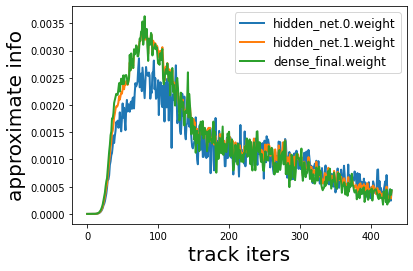

In [6]:
df_info = pd.DataFrame(info_dict)

for col in df_info.columns:
    plt.plot(df_info[col], label=col, lw=2)
plt.legend(fontsize=12)
plt.xlabel('track iters', size=20)
plt.ylabel('approximate info',size=20)
plt.show()

## We still observe the fitting-compressing phase transition. But it can be found the fitting goes faster than the two-layer model.

## How about when we set layers to be four?

In [7]:
__layers__ = [512, 100, 80]
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=True,)
print("finish training and tracking")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.07it/s]


initialize model weights.
done get prior weights
iteration/epoch: 10/0, info: {'hidden_net.0.weight': 2.594923318785604e-17, 'hidden_net.1.weight': 1.1050987294041522e-14, 'hidden_net.3.weight': 1.3091888616495288e-14, 'dense_final.weight': 1.522036573415686e-15}
iteration/epoch: 20/0, info: {'hidden_net.0.weight': 1.2530456544330298e-14, 'hidden_net.1.weight': 4.6392970303073267e-14, 'hidden_net.3.weight': 1.0092357200121096e-16, 'dense_final.weight': 4.410193130827134e-12}
iteration/epoch: 30/0, info: {'hidden_net.0.weight': 1.0523741979847484e-13, 'hidden_net.1.weight': 1.7101305180983184e-13, 'hidden_net.3.weight': 8.695571118624151e-14, 'dense_final.weight': 3.616276982726374e-12}
iteration/epoch: 40/0, info: {'hidden_net.0.weight': 4.2527144457869814e-13, 'hidden_net.1.weight': 5.537967545481137e-13, 'hidden_net.3.weight': 3.65807102491178e-13, 'dense_final.weight': 3.800148130200798e-12}
iteration/epoch: 50/0, info: {'hidden_net.0.weight': 1.2919199130628778e-12, 'hidden_net.1.w

iteration/epoch: 390/0, info: {'hidden_net.0.weight': 0.0004031191929243505, 'hidden_net.1.weight': 0.0008853246690705419, 'hidden_net.3.weight': 0.0008385582477785647, 'dense_final.weight': 0.0009173552389256656}
iteration/epoch: 400/0, info: {'hidden_net.0.weight': 0.0004810079117305577, 'hidden_net.1.weight': 0.0007773760589770973, 'hidden_net.3.weight': 0.0007131660240702331, 'dense_final.weight': 0.0008724576910026371}
iteration/epoch: 410/0, info: {'hidden_net.0.weight': 0.0004219553666189313, 'hidden_net.1.weight': 0.0007673610816709697, 'hidden_net.3.weight': 0.0007100480142980814, 'dense_final.weight': 0.0009082158794626594}
iteration/epoch: 420/0, info: {'hidden_net.0.weight': 0.00037710703327320516, 'hidden_net.1.weight': 0.0007071338477544487, 'hidden_net.3.weight': 0.0006542266346514225, 'dense_final.weight': 0.0007395963184535503}
iteration/epoch: 430/0, info: {'hidden_net.0.weight': 0.0005589656648226082, 'hidden_net.1.weight': 0.000654644041787833, 'hidden_net.3.weight'

iteration/epoch: 790/1, info: {'hidden_net.0.weight': 0.00022027650265954435, 'hidden_net.1.weight': 0.0003417364787310362, 'hidden_net.3.weight': 0.00031287188176065683, 'dense_final.weight': 0.00025659677339717746}
iteration/epoch: 800/1, info: {'hidden_net.0.weight': 0.00020809535635635257, 'hidden_net.1.weight': 0.00031781589495949447, 'hidden_net.3.weight': 0.0002886622096411884, 'dense_final.weight': 0.00019916947348974645}
iteration/epoch: 810/1, info: {'hidden_net.0.weight': 0.00011927323794225231, 'hidden_net.1.weight': 0.00024729390861466527, 'hidden_net.3.weight': 0.0002120352874044329, 'dense_final.weight': 0.000154400389874354}
iteration/epoch: 820/1, info: {'hidden_net.0.weight': 0.0004201788397040218, 'hidden_net.1.weight': 0.00027578332810662687, 'hidden_net.3.weight': 0.00020106465672142804, 'dense_final.weight': 0.0002890178293455392}
iteration/epoch: 830/1, info: {'hidden_net.0.weight': 0.0002687040250748396, 'hidden_net.1.weight': 0.00034460111055523157, 'hidden_net

iteration/epoch: 1190/2, info: {'hidden_net.0.weight': 0.00014516628289129585, 'hidden_net.1.weight': 0.00021706380357500166, 'hidden_net.3.weight': 0.00017817114712670445, 'dense_final.weight': 0.00023394143499899656}
iteration/epoch: 1200/2, info: {'hidden_net.0.weight': 0.00022706339950673282, 'hidden_net.1.weight': 0.00023286066425498575, 'hidden_net.3.weight': 0.0002573532110545784, 'dense_final.weight': 0.00011242239270359278}
iteration/epoch: 1210/2, info: {'hidden_net.0.weight': 0.00013110815780237317, 'hidden_net.1.weight': 0.00018179100879933685, 'hidden_net.3.weight': 0.00023331548436544836, 'dense_final.weight': 3.4126333048334345e-05}
iteration/epoch: 1220/2, info: {'hidden_net.0.weight': 5.108522964292206e-05, 'hidden_net.1.weight': 0.00014713339623995125, 'hidden_net.3.weight': 0.00011187164636794478, 'dense_final.weight': 0.0001742639287840575}
iteration/epoch: 1230/2, info: {'hidden_net.0.weight': 8.975081436801702e-05, 'hidden_net.1.weight': 9.157177555607632e-05, 'hi

iteration/epoch: 1610/3, info: {'hidden_net.0.weight': 0.00011960221308982, 'hidden_net.1.weight': 3.821091740974225e-05, 'hidden_net.3.weight': 5.226853318163194e-05, 'dense_final.weight': 8.926465397962602e-07}
iteration/epoch: 1620/3, info: {'hidden_net.0.weight': 0.00029974846984259784, 'hidden_net.1.weight': 4.6147491957526654e-05, 'hidden_net.3.weight': 1.1936077498830855e-05, 'dense_final.weight': 7.613914203830063e-05}
iteration/epoch: 1630/3, info: {'hidden_net.0.weight': 0.00010387087240815163, 'hidden_net.1.weight': 4.8341997171519324e-05, 'hidden_net.3.weight': 3.965364885516465e-05, 'dense_final.weight': 4.721097138826735e-05}
iteration/epoch: 1640/3, info: {'hidden_net.0.weight': 0.0001950373116414994, 'hidden_net.1.weight': 4.863213689532131e-05, 'hidden_net.3.weight': 4.642265412257984e-05, 'dense_final.weight': 1.2767584394168807e-06}
iteration/epoch: 1650/3, info: {'hidden_net.0.weight': 0.00036819427623413503, 'hidden_net.1.weight': 7.517722406191751e-05, 'hidden_net

iteration/epoch: 2040/4, info: {'hidden_net.0.weight': 0.0001887146063381806, 'hidden_net.1.weight': 9.717267676023766e-05, 'hidden_net.3.weight': 0.00010447361273691058, 'dense_final.weight': 1.5449008060386404e-05}
iteration/epoch: 2050/4, info: {'hidden_net.0.weight': 0.0002478644601069391, 'hidden_net.1.weight': 9.158605098491535e-05, 'hidden_net.3.weight': 8.658266597194597e-05, 'dense_final.weight': 2.221930662926752e-05}
iteration/epoch: 2060/4, info: {'hidden_net.0.weight': 0.00021142794867046177, 'hidden_net.1.weight': 2.961182144645136e-05, 'hidden_net.3.weight': 9.71034387475811e-06, 'dense_final.weight': 5.558380053116707e-06}
iteration/epoch: 2070/4, info: {'hidden_net.0.weight': 0.00023100354883354157, 'hidden_net.1.weight': 8.657606667838991e-05, 'hidden_net.3.weight': 9.931957902153954e-05, 'dense_final.weight': 1.2926409908686765e-05}
iteration/epoch: 2080/4, info: {'hidden_net.0.weight': 9.462278103455901e-05, 'hidden_net.1.weight': 5.7202527386834845e-05, 'hidden_net

iteration/epoch: 2450/5, info: {'hidden_net.0.weight': 0.00030356651404872537, 'hidden_net.1.weight': 9.960461466107517e-05, 'hidden_net.3.weight': 9.824990411289036e-05, 'dense_final.weight': 0.0001414397411281243}
iteration/epoch: 2460/5, info: {'hidden_net.0.weight': 0.00034431720268912613, 'hidden_net.1.weight': 0.00010505261889193207, 'hidden_net.3.weight': 0.00011985284072579816, 'dense_final.weight': 4.7093035391299054e-05}
iteration/epoch: 2470/5, info: {'hidden_net.0.weight': 0.00015566784713882953, 'hidden_net.1.weight': 5.018061347072944e-05, 'hidden_net.3.weight': 5.276812953525223e-05, 'dense_final.weight': 4.4430094021663535e-06}
iteration/epoch: 2480/5, info: {'hidden_net.0.weight': 6.48825807729736e-05, 'hidden_net.1.weight': 5.2759478421648964e-05, 'hidden_net.3.weight': 3.257271237089299e-05, 'dense_final.weight': 2.879061685234774e-05}
iteration/epoch: 2490/5, info: {'hidden_net.0.weight': 0.00012810269254259765, 'hidden_net.1.weight': 4.1874802263919264e-05, 'hidden

iteration/epoch: 2850/6, info: {'hidden_net.0.weight': 0.00010056216706288978, 'hidden_net.1.weight': 8.3638216892723e-05, 'hidden_net.3.weight': 5.021821198170073e-05, 'dense_final.weight': 0.00019786140182986856}
iteration/epoch: 2860/6, info: {'hidden_net.0.weight': 8.788122067926452e-05, 'hidden_net.1.weight': 6.407823093468323e-05, 'hidden_net.3.weight': 4.612166958395392e-05, 'dense_final.weight': 5.110830534249544e-05}
iteration/epoch: 2870/6, info: {'hidden_net.0.weight': 0.00019008779781870544, 'hidden_net.1.weight': 0.0001175334764411673, 'hidden_net.3.weight': 0.00011956202797591686, 'dense_final.weight': 3.5542303521651775e-05}
iteration/epoch: 2880/6, info: {'hidden_net.0.weight': 0.00031413923716172576, 'hidden_net.1.weight': 7.120246300473809e-05, 'hidden_net.3.weight': 5.304840669850819e-05, 'dense_final.weight': 1.2510424312495161e-05}
iteration/epoch: 2890/6, info: {'hidden_net.0.weight': 0.00016819288430269808, 'hidden_net.1.weight': 0.0001278967538382858, 'hidden_ne

iteration/epoch: 3240/7, info: {'hidden_net.0.weight': 0.00024672847939655185, 'hidden_net.1.weight': 0.0001949987927218899, 'hidden_net.3.weight': 0.00018844571604859084, 'dense_final.weight': 0.00019505263480823487}
iteration/epoch: 3250/7, info: {'hidden_net.0.weight': 0.0003537673328537494, 'hidden_net.1.weight': 0.00013504279195331037, 'hidden_net.3.weight': 0.00012367927411105484, 'dense_final.weight': 0.00014547868340741843}
iteration/epoch: 3260/7, info: {'hidden_net.0.weight': 0.00016965248505584896, 'hidden_net.1.weight': 9.90157132036984e-05, 'hidden_net.3.weight': 7.449207623722032e-05, 'dense_final.weight': 0.0001626790763111785}
iteration/epoch: 3270/7, info: {'hidden_net.0.weight': 0.00018093232938554138, 'hidden_net.1.weight': 0.00010624225251376629, 'hidden_net.3.weight': 8.621262531960383e-05, 'dense_final.weight': 0.00010224515426671132}
iteration/epoch: 3280/7, info: {'hidden_net.0.weight': 0.00012802347191609442, 'hidden_net.1.weight': 9.400431008543819e-05, 'hidde

iteration/epoch: 3630/8, info: {'hidden_net.0.weight': 0.00022296226234175265, 'hidden_net.1.weight': 0.00015377164527308196, 'hidden_net.3.weight': 0.00015592934505548328, 'dense_final.weight': 5.002860052627511e-05}
iteration/epoch: 3640/8, info: {'hidden_net.0.weight': 0.00012910671648569405, 'hidden_net.1.weight': 0.00011827404523501173, 'hidden_net.3.weight': 0.00013375021808315068, 'dense_final.weight': 3.308624218334444e-05}
iteration/epoch: 3650/8, info: {'hidden_net.0.weight': 0.0001909164129756391, 'hidden_net.1.weight': 0.0001827144151320681, 'hidden_net.3.weight': 0.000125174003187567, 'dense_final.weight': 0.0001829693792387843}
iteration/epoch: 3660/8, info: {'hidden_net.0.weight': 0.0002286254893988371, 'hidden_net.1.weight': 0.0001843432110035792, 'hidden_net.3.weight': 0.00017076777294278145, 'dense_final.weight': 0.00013299401325639337}
iteration/epoch: 3670/8, info: {'hidden_net.0.weight': 0.0002144165919162333, 'hidden_net.1.weight': 0.0002164147881558165, 'hidden_n

iteration/epoch: 4050/9, info: {'hidden_net.0.weight': 0.0005067526362836361, 'hidden_net.1.weight': 0.0003136851591989398, 'hidden_net.3.weight': 0.0003454350517131388, 'dense_final.weight': 0.00018803866987582296}
iteration/epoch: 4060/9, info: {'hidden_net.0.weight': 0.00019776458793785423, 'hidden_net.1.weight': 0.00018416470265947282, 'hidden_net.3.weight': 0.0002590804360806942, 'dense_final.weight': 5.6104938266798854e-05}
iteration/epoch: 4070/9, info: {'hidden_net.0.weight': 0.00036565540358424187, 'hidden_net.1.weight': 0.00015928431821521372, 'hidden_net.3.weight': 0.00011056059884140268, 'dense_final.weight': 8.742966019781306e-05}
iteration/epoch: 4080/9, info: {'hidden_net.0.weight': 0.00017336408200208098, 'hidden_net.1.weight': 0.0002532788785174489, 'hidden_net.3.weight': 0.0002441855031065643, 'dense_final.weight': 0.00017017178470268846}
iteration/epoch: 4090/9, info: {'hidden_net.0.weight': 0.000217840846744366, 'hidden_net.1.weight': 0.0002723874640651047, 'hidden_

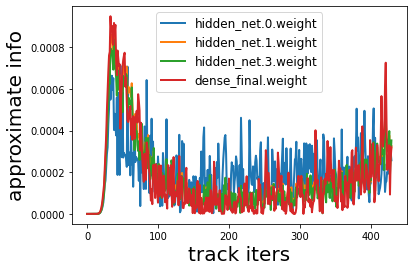

In [8]:
df_info = pd.DataFrame(info_dict)

for col in df_info.columns:
    plt.plot(df_info[col], label=col, lw=2)
plt.legend(fontsize=12)
plt.xlabel('track iters', size=20)
plt.ylabel('approximate info',size=20)
plt.show()

## Fitting happens even faster, therefore it seems that overfitting happens near the end of training.